## Meal delivery analysis

#### In this notebook I will be analysing a dataset provided by Analytics Vidhya & Genpact  Dec 15 2018 for a machine learning hackathon. The data was found on kaggle.com and was uploded by Saptarshi Ghosh.
I first imported this dataset into PostgreSQL. Then utilizing SQL knowledge, I extracted the data. I used CTEs(aka with statements) to join the tables.
This is a very interesting project for me because of its field. I am an intern in a food delivery company so it is a bit like a real world case, from extracting data to the insights nad forecasting

In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [55]:
df=pd.read_csv('meal_data.csv')

In [211]:
df.head()

,center_id,city_code,region,center_type,op_area,id,meal_id,category,cuisine,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,59,456,56,TYPE_A,4.2,1000784,1207,Beverages,Continental,122,513.13,514.13,0,0,54
1,59,456,56,TYPE_A,4.2,1002596,2322,Beverages,Continental,122,515.13,513.13,0,0,69
2,59,456,56,TYPE_A,4.2,1003875,1230,Beverages,Continental,56,474.33,476.33,0,0,40
3,59,456,56,TYPE_A,4.2,1005904,2322,Beverages,Continental,59,452.99,452.99,0,0,162
4,59,456,56,TYPE_A,4.2,1006658,1230,Beverages,Continental,43,474.33,475.33,0,0,27


In [163]:
df.describe()

,center_id,city_code,region,op_area,id,meal_id,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
count,456548.000000,456548.000000,456548.000000,456548.000000,4.565480e+05,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.00000,456548.000000
mean,82.105796,601.553399,56.614566,4.083590,1.250096e+06,2024.337458,74.768771,332.238933,354.156627,0.081152,0.10920,261.872760
std,45.975046,66.195914,17.641306,1.091686,1.443548e+05,547.420920,41.524956,152.939723,160.715914,0.273069,0.31189,395.922798
min,10.000000,456.000000,23.000000,0.900000,1.000000e+06,1062.000000,1.000000,2.970000,55.350000,0.000000,0.00000,13.000000
25%,43.000000,553.000000,34.000000,3.600000,1.124999e+06,1558.000000,39.000000,228.950000,243.500000,0.000000,0.00000,54.000000
50%,76.000000,596.000000,56.000000,4.000000,1.250184e+06,1993.000000,76.000000,296.820000,310.460000,0.000000,0.00000,136.000000
75%,110.000000,651.000000,77.000000,4.500000,1.375140e+06,2539.000000,111.000000,445.230000,458.870000,0.000000,0.00000,324.000000
max,186.000000,713.000000,93.000000,7.000000,1.499999e+06,2956.000000,145.000000,866.270000,866.270000,1.000000,1.00000,24299.000000


In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   center_id              456548 non-null  int64  
 1   city_code              456548 non-null  int64  
 2   region                 456548 non-null  int64  
 3   center_type            456548 non-null  object 
 4   op_area                456548 non-null  float64
 5   id                     456548 non-null  int64  
 6   meal_id                456548 non-null  int64  
 7   category               456548 non-null  object 
 8   cuisine                456548 non-null  object 
 9   week                   456548 non-null  int64  
 10  checkout_price         456548 non-null  float64
 11  base_price             456548 non-null  float64
 12  emailer_for_promotion  456548 non-null  int64  
 13  homepage_featured      456548 non-null  int64  
 14  num_orders             456548 non-nu

<AxesSubplot:>

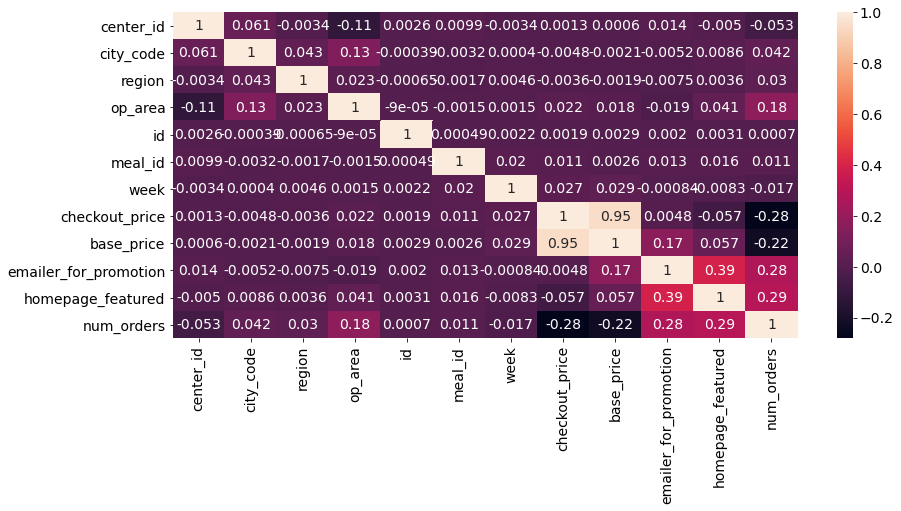

In [568]:
plt.figure(figsize=(14,6))
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:xlabel='num_orders', ylabel='Count'>

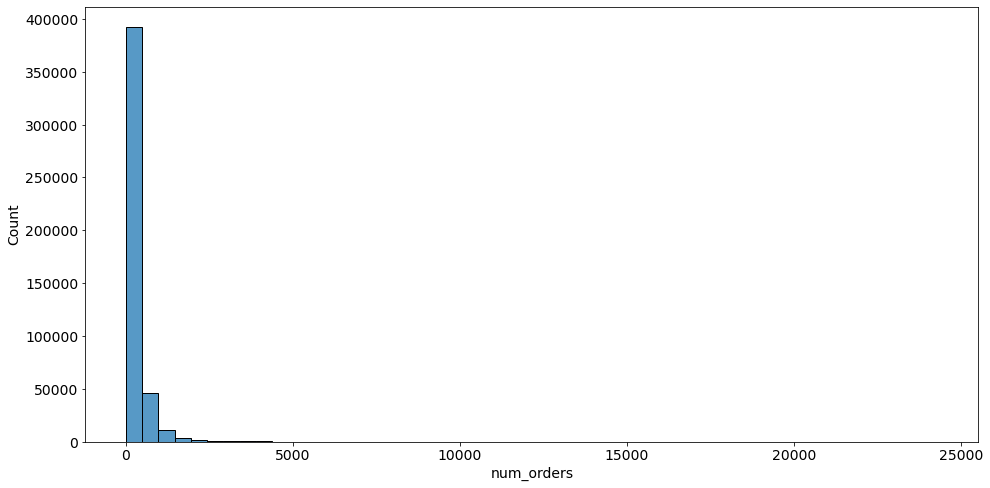

In [166]:
sns.histplot(data=df,x="num_orders",bins=50)

<AxesSubplot:xlabel='checkout_price', ylabel='Count'>

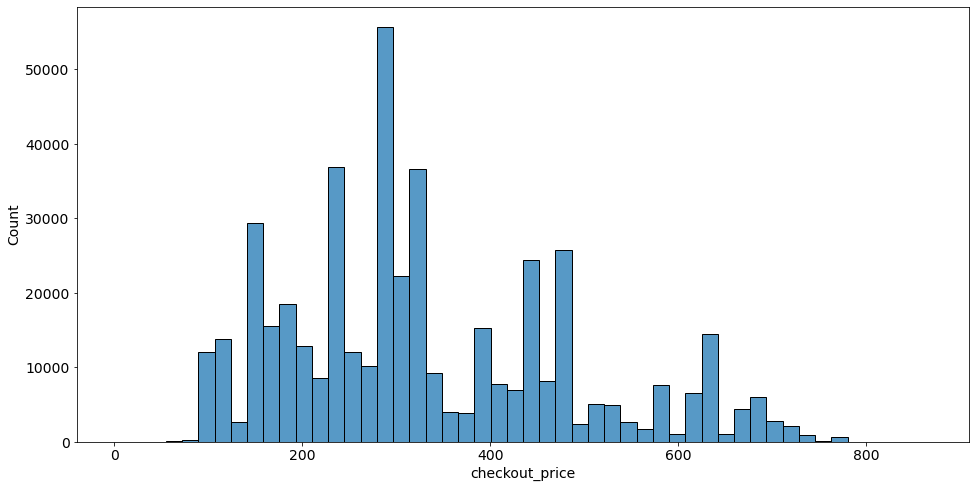

In [167]:
sns.histplot(data=df,x="checkout_price",bins=50)

<AxesSubplot:xlabel='week', ylabel='num_orders'>

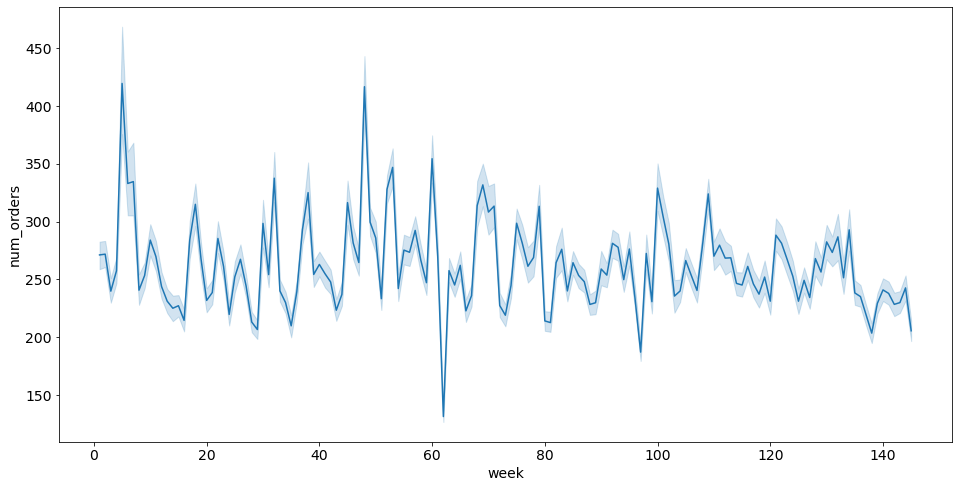

In [168]:
sns.lineplot(data=df,x='week',y='num_orders')

In [303]:
groupby_sum=df.groupby(['cuisine']).sum()

In [312]:
groupby_sum.reset_index(inplace=True)

In [311]:
groupby_sum

,center_id,city_code,region,op_area,id,meal_id,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
cuisine,,,,,,,,,,,,
Continental,8513769,61804782,5788324,419122.2,128520602222,200598002,7869075,5.304004e+07,5.732159e+07,16963,15467,16914439
Indian,9309766,67634179,6359942,461194.6,140840636871,211127209,8299180,3.837477e+07,4.093340e+07,6334,8653,25792544
Italian,10229668,73817688,6931761,494309.8,153675263988,259486752,9260708,3.504999e+07,3.694146e+07,10592,10282,44172832
Thai,9432034,71381352,6767240,489728.2,147692465063,252995255,8706570,2.521822e+07,2.649304e+07,3161,15453,32677670


<AxesSubplot:xlabel='cuisine', ylabel='num_orders'>

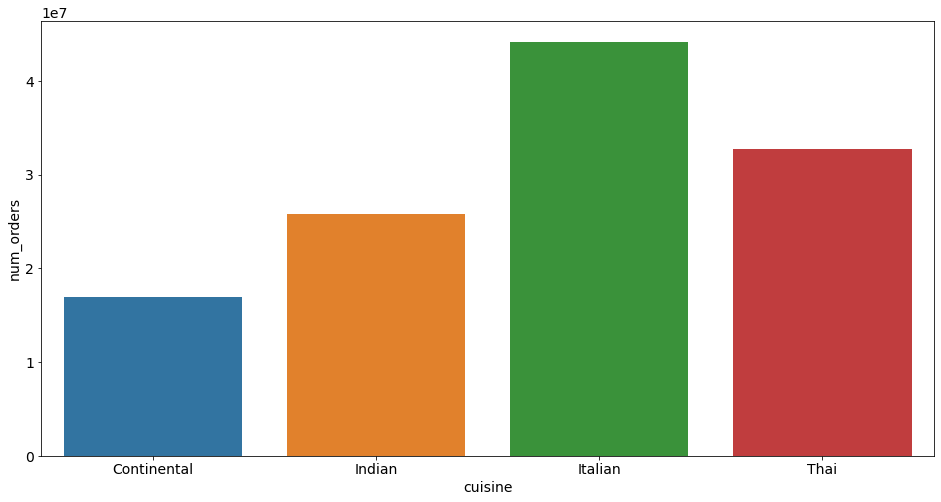

In [317]:
sns.barplot(data=groupby_sum, x='cuisine',y='num_orders')

<AxesSubplot:xlabel='category', ylabel='num_orders'>

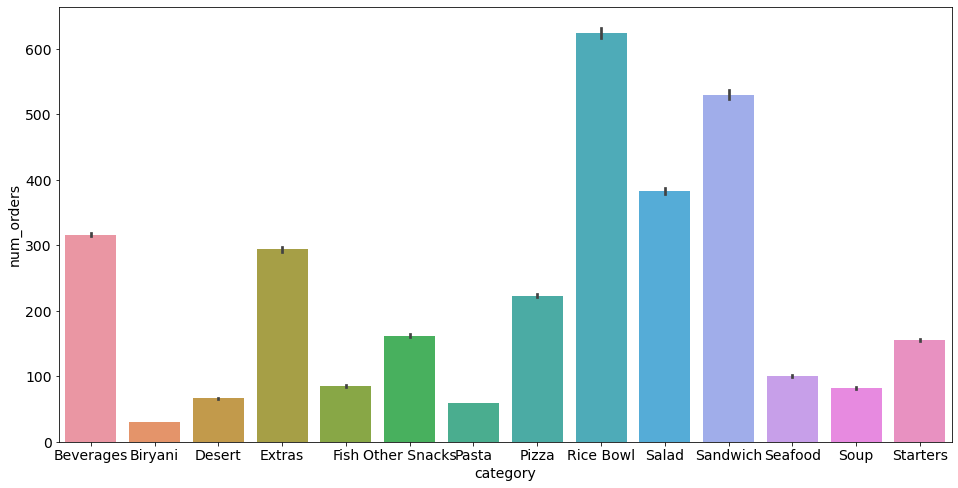

In [319]:
sns.barplot(data=df, x='category',y='num_orders')

In [202]:
df.groupby(['week']).mean()

,center_id,city_code,region,op_area,id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
week,,,,,,,,,,,
1,81.552019,601.802190,56.670431,4.079877,1.247659e+06,1977.382957,330.530205,348.516537,0.122177,0.141684,271.136550
2,81.420925,601.921961,56.691298,4.085014,1.248203e+06,1980.309738,323.926944,347.299448,0.214434,0.177486,271.783149
3,81.822008,601.939289,56.703346,4.078682,1.247274e+06,1974.210072,327.202580,347.827544,0.035874,0.109003,239.828217
4,81.723088,601.919003,56.641398,4.087747,1.250912e+06,1980.793354,330.160502,348.372066,0.000000,0.101073,257.365524
5,83.101434,601.981462,56.298356,4.077824,1.249198e+06,1980.389647,315.194676,350.148709,0.117873,0.162994,419.263729
...,...,...,...,...,...,...,...,...,...,...,...
141,82.005823,601.076004,56.718357,4.091603,1.249765e+06,2029.790990,347.367882,358.118737,0.070794,0.091940,237.891511
142,82.213712,601.712168,56.685917,4.097468,1.250767e+06,2028.358246,347.298610,357.043981,0.071340,0.086164,228.431439
143,82.227534,601.156127,56.742209,4.077186,1.250228e+06,2032.778517,342.346188,361.157256,0.022995,0.066566,229.932224


In [170]:
df['cuisine'].value_counts()

Italian        122925
Thai           118216
Indian         112612
Continental    102795
Name: cuisine, dtype: int64

It seems like the most order type of cuisine is Italian. There are also more Italian restaurants in this dataset. But the most expesive one is Continental. I bet if this dataset had fast food restaurants it would be the most ordered.

#### Deep dive into Italian restaurants

In [171]:
italian=df[df['cuisine']=='Italian']

In [172]:
italian

,center_id,city_code,region,center_type,op_area,id,meal_id,category,cuisine,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
814,59,456,56,TYPE_A,4.2,1000290,1062,Beverages,Italian,34,162.05,183.36,0,0,636
815,59,456,56,TYPE_A,4.2,1002197,2707,Beverages,Italian,54,191.09,230.92,0,0,566
816,59,456,56,TYPE_A,4.2,1002391,2707,Beverages,Italian,129,235.71,235.71,0,0,499
817,59,456,56,TYPE_A,4.2,1004125,1062,Beverages,Italian,135,192.09,191.09,0,0,512
818,59,456,56,TYPE_A,4.2,1004985,1062,Beverages,Italian,92,161.08,182.36,0,0,433
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455256,27,713,85,TYPE_A,4.5,1495892,1971,Sandwich,Italian,32,243.50,309.43,1,0,1876
455257,27,713,85,TYPE_A,4.5,1496122,1754,Sandwich,Italian,63,273.54,274.54,0,0,244
455258,27,713,85,TYPE_A,4.5,1496996,1971,Sandwich,Italian,20,288.09,289.09,0,0,150
455259,27,713,85,TYPE_A,4.5,1497619,2826,Sandwich,Italian,130,349.20,350.20,0,0,701


In [173]:
italian['category'].value_counts()

Beverages    33381
Sandwich     33291
Salad        28559
Pasta        27694
Name: category, dtype: int64

In [174]:
df['category'].value_counts()

Beverages       127890
Rice Bowl        33408
Sandwich         33291
Pizza            33138
Starters         29941
Other Snacks     29379
Desert           29294
Salad            28559
Pasta            27694
Seafood          26916
Biryani          20614
Extras           13562
Soup             12675
Fish             10187
Name: category, dtype: int64

In [175]:
it_category_ratio=italian['category'].value_counts()/df['category'].value_counts()*100

In [176]:
it_category_ratio.dropna()

Beverages     26.101337
Pasta        100.000000
Salad        100.000000
Sandwich     100.000000
Name: category, dtype: float64

All of the pasta, salad and sandwich ordered are from Italian cuisine. While beverages corresponds to 26% of the total order

<AxesSubplot:xlabel='checkout_price', ylabel='Count'>

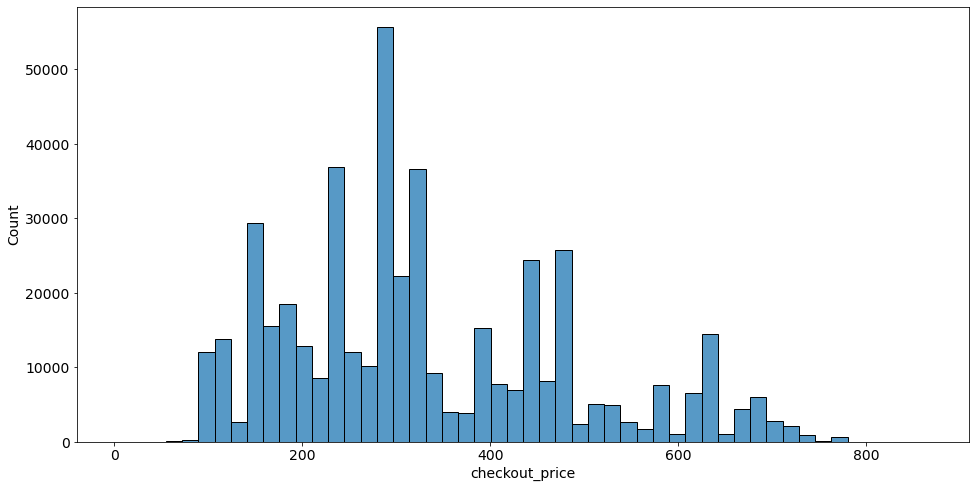

In [177]:
sns.histplot(data=df,x='checkout_price',bins=50)

In [178]:
italian['checkout_price'].sum()/df['checkout_price'].sum()

0.23107389718642668

The Italian checkout price corresponds to 23.1% of all checkout price

In [179]:
italian[italian['checkout_price']==italian['checkout_price'].max()]

,center_id,city_code,region,center_type,op_area,id,meal_id,category,cuisine,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
26361,110,485,77,TYPE_A,3.8,1117422,2126,Pasta,Italian,48,670.27,514.16,0,1,15


This is the highest check out price in the italian cuisine

In [180]:
italian[italian['num_orders']==italian['num_orders'].max()]

,center_id,city_code,region,center_type,op_area,id,meal_id,category,cuisine,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
182321,43,590,56,TYPE_A,5.1,1346216,1971,Sandwich,Italian,132,204.7,324.04,1,1,13150


But the highest number of orders are from this meal_id which is a sandwich

#### Timeseries ARIMA

In [56]:
df3= pd.read_csv('meal_data.csv',index_col='week',parse_dates=True)

In [57]:
df3.head()

,center_id,city_code,region,center_type,op_area,id,meal_id,category,cuisine,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
week,,,,,,,,,,,,,,
122,59,456,56,TYPE_A,4.2,1000784,1207,Beverages,Continental,513.13,514.13,0,0,54
122,59,456,56,TYPE_A,4.2,1002596,2322,Beverages,Continental,515.13,513.13,0,0,69
56,59,456,56,TYPE_A,4.2,1003875,1230,Beverages,Continental,474.33,476.33,0,0,40
59,59,456,56,TYPE_A,4.2,1005904,2322,Beverages,Continental,452.99,452.99,0,0,162
43,59,456,56,TYPE_A,4.2,1006658,1230,Beverages,Continental,474.33,475.33,0,0,27


In [58]:
df3.drop(['center_id','city_code','region','op_area','id','meal_id','checkout_price','base_price','emailer_for_promotion','homepage_featured','center_type','category','cuisine'],axis=1,inplace=True)

In [59]:
df3.head()

,num_orders
week,
122,54
122,69
56,40
59,162
43,27


In [60]:
df3=df3.groupby('week').mean()

Converting week to a date range so we can do a timeseries analysis

In [61]:
df3['Date'] = pd.date_range('2018-01-01', periods=145, freq='W')

In [62]:
df3.set_index('Date',inplace=True)

In [63]:
df3

,num_orders
Date,
2018-01-07,271.136550
2018-01-14,271.783149
2018-01-21,239.828217
2018-01-28,257.365524
2018-02-04,419.263729
...,...
2020-09-13,237.891511
2020-09-20,228.431439
2020-09-27,229.932224


In [64]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [65]:
result= seasonal_decompose(df3['num_orders'],model='aditive')

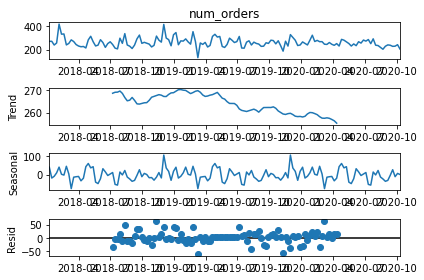

In [66]:
result.plot();

<AxesSubplot:xlabel='Date'>

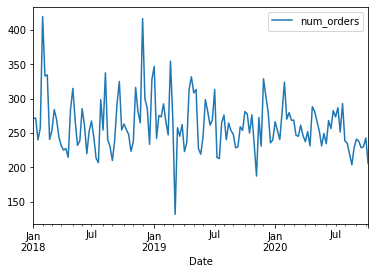

In [67]:
df3.plot()

In [68]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [69]:
df3.index.freq = 'W'
df3.index

DatetimeIndex(['2018-01-07', '2018-01-14', '2018-01-21', '2018-01-28',
               '2018-02-04', '2018-02-11', '2018-02-18', '2018-02-25',
               '2018-03-04', '2018-03-11',
               ...
               '2020-08-09', '2020-08-16', '2020-08-23', '2020-08-30',
               '2020-09-06', '2020-09-13', '2020-09-20', '2020-09-27',
               '2020-10-04', '2020-10-11'],
              dtype='datetime64[ns]', name='Date', length=145, freq='W-SUN')

In [70]:
span = 7
alpha = 2/(span+1)

In [71]:
df3.head()

,num_orders
Date,
2018-01-07,271.136550
2018-01-14,271.783149
2018-01-21,239.828217
2018-01-28,257.365524
2018-02-04,419.263729


In [72]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

df3['Exp_Smooth'] = ExponentialSmoothing(df3['num_orders'], trend='add').fit().fittedvalues.shift(-1)

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,


In [73]:
df3

,num_orders,Exp_Smooth
Date,,
2018-01-07,271.136550,270.718813
2018-01-14,271.783149,270.582588
2018-01-21,239.828217,267.986031
2018-01-28,257.365524,266.899152
2018-02-04,419.263729,278.406743
...,...,...
2020-09-13,237.891511,247.340981
2020-09-20,228.431439,245.588956
2020-09-27,229.932224,244.058986


In [75]:
df3

,num_orders,Exp_Smooth
Date,,
2018-01-07,271.136550,270.718813
2018-01-14,271.783149,270.582588
2018-01-21,239.828217,267.986031
2018-01-28,257.365524,266.899152
2018-02-04,419.263729,278.406743
...,...,...
2020-09-13,237.891511,247.340981
2020-09-20,228.431439,245.588956
2020-09-27,229.932224,244.058986


In [76]:
df3['DESmul7'] = ExponentialSmoothing(df3['num_orders'], trend='mul').fit().fittedvalues.shift(-1)
df3.head(10)

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,


,num_orders,Exp_Smooth,DESmul7
Date,,,
2018-01-07,271.136550,270.718813,272.381203
2018-01-14,271.783149,270.582588,272.983429
2018-01-21,239.828217,267.986031,271.064701
2018-01-28,257.365524,266.899152,270.596716
2018-02-04,419.263729,278.406743,282.689712
2018-02-11,332.848911,282.576282,287.417730
2018-02-18,334.455456,286.632826,291.998687
2018-02-25,240.674085,283.200379,289.042714
2018-03-04,253.413805,280.947244,287.214061


<AxesSubplot:xlabel='Date'>

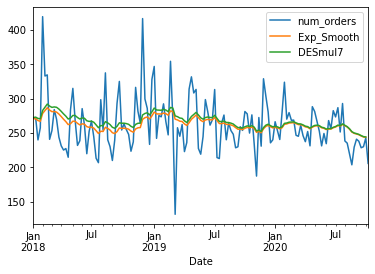

In [77]:
df3.plot()

In [78]:
df3['TESadd7'] = ExponentialSmoothing(df3['num_orders'],trend='add',seasonal='add',seasonal_periods=7).fit().fittedvalues
df3.head()

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,


,num_orders,Exp_Smooth,DESmul7,TESadd7
Date,,,,
2018-01-07,271.136550,270.718813,272.381203,277.528183
2018-01-14,271.783149,270.582588,272.983429,284.508112
2018-01-21,239.828217,267.986031,271.064701,292.101053
2018-01-28,257.365524,266.899152,270.596716,294.164382
2018-02-04,419.263729,278.406743,282.689712,306.361030


<AxesSubplot:xlabel='Date'>

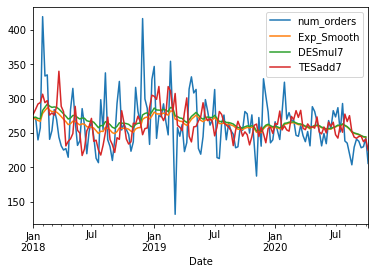

In [79]:
df3.plot()

In [80]:
df3['TES_trend_mul'] = ExponentialSmoothing(df3['num_orders'],trend='mul',seasonal='add',seasonal_periods=7).fit().fittedvalues
df3.head()

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters/model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


,num_orders,Exp_Smooth,DESmul7,TESadd7,TES_trend_mul
Date,,,,,
2018-01-07,271.136550,270.718813,272.381203,277.528183,260.139649
2018-01-14,271.783149,270.582588,272.983429,284.508112,266.677680
2018-01-21,239.828217,267.986031,271.064701,292.101053,273.701069
2018-01-28,257.365524,266.899152,270.596716,294.164382,282.791602
2018-02-04,419.263729,278.406743,282.689712,306.361030,298.283679


<AxesSubplot:xlabel='Date'>

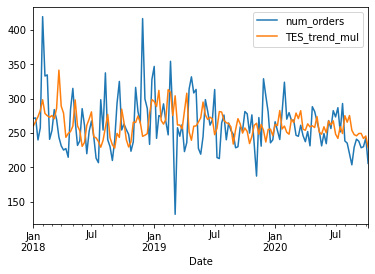

In [81]:
df3[['num_orders','TES_trend_mul']].plot()

In [82]:
df3['TES_season_mul'] = ExponentialSmoothing(df3['num_orders'],trend='add',seasonal='mul',seasonal_periods=7).fit().fittedvalues
df3.head()

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,


,num_orders,Exp_Smooth,DESmul7,TESadd7,TES_trend_mul,TES_season_mul
Date,,,,,,
2018-01-07,271.136550,270.718813,272.381203,277.528183,260.139649,272.431324
2018-01-14,271.783149,270.582588,272.983429,284.508112,266.677680,274.453167
2018-01-21,239.828217,267.986031,271.064701,292.101053,273.701069,278.986626
2018-01-28,257.365524,266.899152,270.596716,294.164382,282.791602,292.364105
2018-02-04,419.263729,278.406743,282.689712,306.361030,298.283679,294.316323


<AxesSubplot:xlabel='Date'>

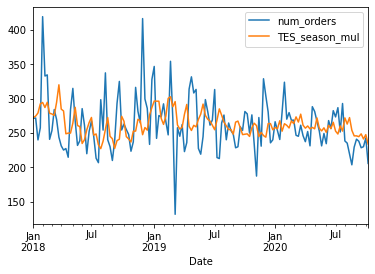

In [83]:
df3[['num_orders','TES_season_mul']].plot()

In [84]:
df3['TES_mul_mul'] = ExponentialSmoothing(df3['num_orders'],trend='mul',seasonal='mul',seasonal_periods=7).fit().fittedvalues
df3.head(8)

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters/model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


,num_orders,Exp_Smooth,DESmul7,TESadd7,TES_trend_mul,TES_season_mul,TES_mul_mul
Date,,,,,,,
2018-01-07,271.136550,270.718813,272.381203,277.528183,260.139649,272.431324,278.373277
2018-01-14,271.783149,270.582588,272.983429,284.508112,266.677680,274.453167,280.286779
2018-01-21,239.828217,267.986031,271.064701,292.101053,273.701069,278.986626,285.900046
2018-01-28,257.365524,266.899152,270.596716,294.164382,282.791602,292.364105,299.473312
2018-02-04,419.263729,278.406743,282.689712,306.361030,298.283679,294.316323,305.348834
2018-02-11,332.848911,282.576282,287.417730,294.011462,278.374067,287.015142,297.941318
2018-02-18,334.455456,286.632826,291.998687,297.077370,275.084662,294.609858,306.922823
2018-02-25,240.674085,283.200379,289.042714,275.981208,272.743517,278.573269,283.809811


<AxesSubplot:xlabel='Date'>

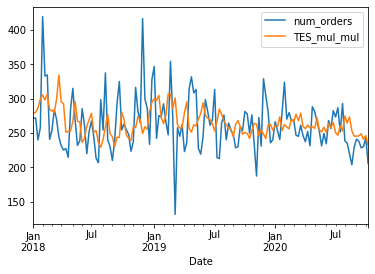

In [85]:
df3[['num_orders','TES_mul_mul']].plot()

In [86]:
df3['test1']=ExponentialSmoothing(df3['num_orders'],trend='mul',seasonal_periods=7).fit().fittedvalues

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,


In [87]:
df3.head()

,num_orders,Exp_Smooth,DESmul7,TESadd7,TES_trend_mul,TES_season_mul,TES_mul_mul,test1
Date,,,,,,,,
2018-01-07,271.136550,270.718813,272.381203,277.528183,260.139649,272.431324,278.373277,271.783149
2018-01-14,271.783149,270.582588,272.983429,284.508112,266.677680,274.453167,280.286779,272.381203
2018-01-21,239.828217,267.986031,271.064701,292.101053,273.701069,278.986626,285.900046,272.983429
2018-01-28,257.365524,266.899152,270.596716,294.164382,282.791602,292.364105,299.473312,271.064701
2018-02-04,419.263729,278.406743,282.689712,306.361030,298.283679,294.316323,305.348834,270.596716


<AxesSubplot:xlabel='Date'>

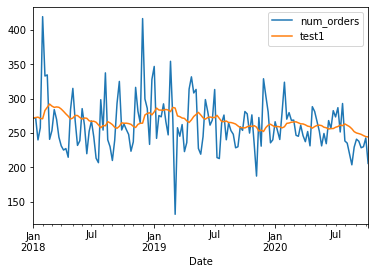

In [88]:
df3[['num_orders','test1']].plot()

### Predicting

In [89]:
df3.index

DatetimeIndex(['2018-01-07', '2018-01-14', '2018-01-21', '2018-01-28',
               '2018-02-04', '2018-02-11', '2018-02-18', '2018-02-25',
               '2018-03-04', '2018-03-11',
               ...
               '2020-08-09', '2020-08-16', '2020-08-23', '2020-08-30',
               '2020-09-06', '2020-09-13', '2020-09-20', '2020-09-27',
               '2020-10-04', '2020-10-11'],
              dtype='datetime64[ns]', name='Date', length=145, freq='W-SUN')

In [90]:
train_data= df3.iloc[:109]
test_data= df3.iloc[108:]

In [91]:
fitted_model= ExponentialSmoothing(train_data['num_orders'],trend='add',seasonal='add',seasonal_periods=50).fit()

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,


In [92]:
test_predictions= fitted_model.forecast(35)

<AxesSubplot:xlabel='Date'>

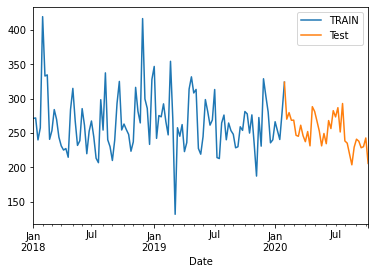

In [93]:
train_data['num_orders'].plot(legend=True, label='TRAIN')
test_data['num_orders'].plot(legend=True, label='Test')

<AxesSubplot:xlabel='Date'>

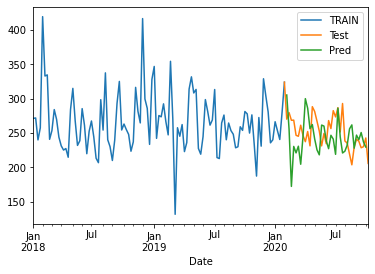

In [94]:
train_data['num_orders'].plot(legend=True, label='TRAIN')
test_data['num_orders'].plot(legend=True, label='Test')
test_predictions.plot(legend=True, label='Pred')

In [95]:
from pandas.plotting import lag_plot

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

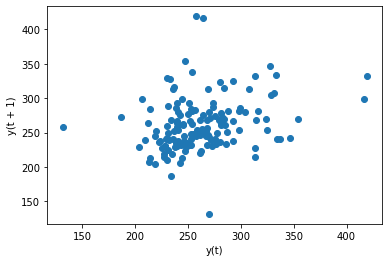

In [96]:
lag_plot(df3['num_orders'])

From this plot we can see that the values are not correlated so it is not stationary

In [97]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

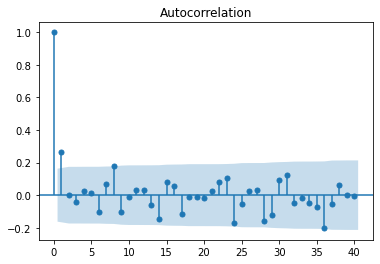

In [98]:
plot_acf(df3['num_orders'],lags=40);

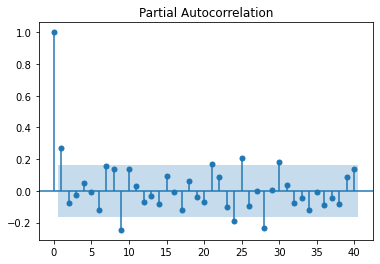

In [99]:
plot_pacf(df3['num_orders'],lags=40);

### SARIMAX
First lets try the ARIMA model

In [ ]:
from pmdarima import auto_arima

In [216]:
len(df3)

145

In [219]:
train= df3.iloc[:115]

In [221]:
test= df3.iloc[115:]

In [745]:
auto_arima(df3['num_orders'], seasonal=True, m=14).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                  145
Model:             SARIMAX(1, 0, 0)x(0, 0, [1, 2], 14)   Log Likelihood                -724.288
Date:                                 Tue, 09 Mar 2021   AIC                           1458.577
Time:                                         10:47:39   BIC                           1473.461
Sample:                                              0   HQIC                          1464.625
                                                 - 145                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    190.9402     25.523      7.481      0.000     140.916     240.964
ar.L1          0.2727      0.097      2.824      0.005       0.083       0.462
ma.S.L14      -0.2715      0.075     -3.637      0.000      -0.418      -0.125
ma.S.L28      -0.1859      0.087     -2.142      0.032      -0.356      -0.016
sigma2      1253.2191    107.852     11.620      0.000    1041.833    1464.605
===================================================================================
Ljung-Box (L1) (Q):                   0.25   Jarque-Bera (JB):               112.79
Prob(Q):                              0.62   Prob(JB):                         0.00
Heteroskedasticity (H):               0.33   Skew:                             1.24
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [746]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [1080]:
model= SARIMAX(train['num_orders'], order=(0,0,1), seasonal_order=(4, 0, 2, 14), enforce_invertibility=False)

In [1081]:
results= model.fit()

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [1082]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                              num_orders   No. Observations:                  115
Model:             SARIMAX(0, 0, 1)x(4, 0, [1, 2], 14)   Log Likelihood                -715.383
Date:                                 Tue, 09 Mar 2021   AIC                           1446.766
Time:                                         11:11:32   BIC                           1468.725
Sample:                                     01-07-2018   HQIC                          1455.679
                                          - 03-15-2020                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.1413      0.332     -0.425      0.671      -0.793       0.510
ar.S.L14      -0.6877      2.218     -0.310      0.757      -5.036       3.660
ar.S.L28       0.4122      1.387      0.297      0.766      -2.306       3.131
ar.S.L42       0.9607      0.618      1.554      0.120      -0.251       2.173
ar.S.L56       0.0592      0.520      0.114      0.909      -0.961       1.079
ma.S.L14       1.5577      2.845      0.547      0.584      -4.019       7.134
ma.S.L28       1.0030      3.126      0.321      0.748      -5.123       7.129
sigma2       2.52e+04   9.29e+04      0.271      0.786   -1.57e+05    2.07e+05
===================================================================================
Ljung-Box (L1) (Q):                  23.35   Jarque-Bera (JB):                10.60
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.32   Skew:                            -0.40
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.2e+14. Standard errors may be unstable.
"""

In [1083]:
start= len(train)
end= len(train)+ len(test)-1

In [1084]:
predictions= results.predict(start, end).rename('SARIMA Model')

<AxesSubplot:xlabel='Date'>

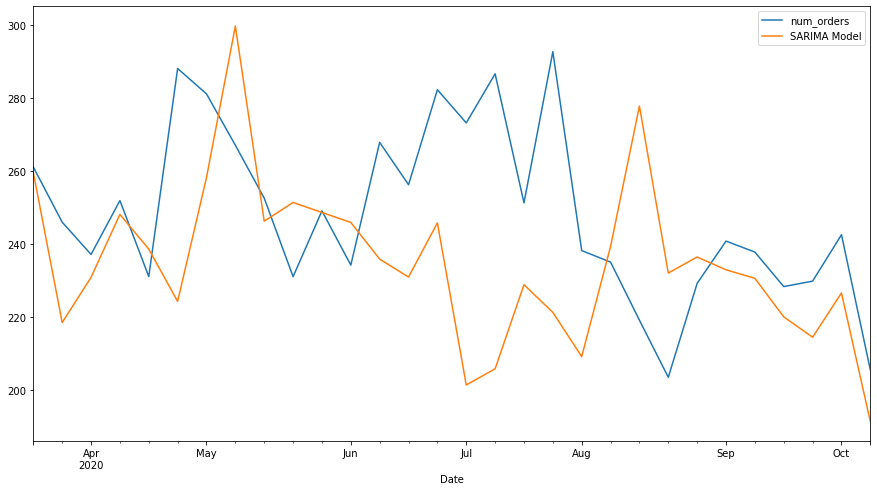

In [1085]:
ax= test['num_orders'].plot(legend=True, figsize=(15,8))
predictions.plot(legend=True)

### Forecasting 10 weeks

In [1091]:
fcast= results.predict(len(df3), len(df3)+10, typ='levels').rename('SARIMA FORECAST')

<AxesSubplot:xlabel='Date'>

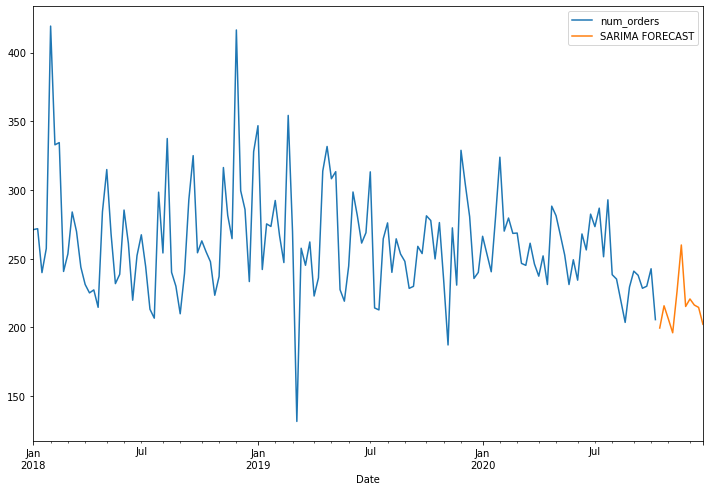

In [1092]:
df3['num_orders'].plot(figsize=(12,8),legend=True)
fcast.plot(legend=True)